# biocharStability - a model disclosure demonstration

This notebook shows how to use the functions contained in the ``biocharStability`` library, for building a complete model.

__Pre-requisites:__
- your forked/cloned/downloaded the GitHub repository (https://github.com/SLU-biochar/biocharStability)
- you created a python environment (``conda create -n biocharstab python=3.9``)
- in this environment, you installed via pip (in editable format) the ``biocharStability`` library (``pip install -e .``). 

Note: core dependencies will also be installed via the pip command. If something is missing in the environment, install it via conda or pip, on your own, whenever an error occurs, telling a package is missing  :-)

More info on installation here https://github.com/SLU-biochar/biocharStability#how-to-install-or-use

__Documentation:__

The library has an automatically generated documentation. Go to the folder ``docs`` and open the ``index.html`` file in a web browser.

__Contents of this notebook:__


In [1]:
# importing the library (and other libraries as needed)
import biocharStability as bs
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt 

## Load the data

In [4]:
# step 1: load the data
fp = '../biocharStability/database/biochar_incubation_database_2022-03-22_live.xlsx'
metadata, schema, metadata_column_sets = bs.load_metadata(filepath=fp)
data = bs.load_data(filepath=fp)
articles = bs.load_articles(filepath=fp)
validation = bs.load_validation(filepath=fp)

Metadata loaded, with 181 rows
Data loaded, with 2814 rows
Articles loaded, with 75 rows
Validation loaded, with 128 rows


## Perform curve-fitting on all observations


Using various kinds of model functions, initial conditions, algorithm, ... 

This takes a couple of minutes, the more strategies, the more time.

In [21]:
# defining fitting strategies
fitting_strategies = [
    # single exp, 100% at t0
    #(bs.singleExp, 'lm',  None, ( (-1*np.inf), (np.inf) ) ), 
    (bs.singleExp, 'trf', None, ( (-1*np.inf), (np.inf) ) ),
    #(singleExp, 'dogbox', ( (-1*np.inf), (np.inf) ) ),
    
    # single exp, unconstrained
    #(bs.singleExp_u, 'lm', None, ( (-1*np.inf), (np.inf) ) ),
    (bs.singleExp_u, 'trf', None, ( (-1*np.inf), (np.inf) ) ),
    #(singleExp_u, 'dogbox', ( (-1*np.inf), (np.inf) ) ),
        # with bounds
        #(singleExp_u, 'trf',    ( [0, 0], [1000, 100] ) ), # 0 < k < 1000,  0< c <100
        #(singleExp_u, 'trf',    ( (0, 0), (50, 100) ) ), # 0 < k < 50,  0< c <100
    
    # double exp, 100% at t0
    #(bs.doubleExp, 'lm', None, ( (-1*np.inf), (np.inf) ) ),
    (bs.doubleExp, 'trf', None, ( (-1*np.inf), (np.inf) ) ),
    #(doubleExp, 'dogbox', ( (-1*np.inf), (np.inf) ) ),
        # with bounds
        #(doubleExp, 'trf',    ( (0, 0, 0), (1000, 1000, 100) ) ), # 0 < k1 < 1000, 0 < k2 < 1000,  0< c1 <100
        #(doubleExp, 'trf',    ( (0, 0, 0), (50, 1, 100) ) ), # 0 < k1 < 50, 0 < k2 < 1,  0< c1 <100
        # with p0
        #(bs.doubleExp, 'lm', [0.000001, 0.001, 100], ( (-1*np.inf), (np.inf) ) ),
        #(bs.doubleExp, 'lm', [0.00000001, 0.001, 100], ( (-1*np.inf), (np.inf) ) ),
        #(bs.doubleExp, 'lm', [0.00001, 10, 100], ( (-1*np.inf), (np.inf) ) ),
        #(bs.doubleExp, 'lm', [0.0001, 1, 100], ( (-1*np.inf), (np.inf) ) ),

        (bs.doubleExp, 'trf', [0.000001, 0.001, 100], ( (-1*np.inf), (np.inf) ) ),
        #(bs.doubleExp, 'trf', [0.00000001, 0.001, 100], ( (-1*np.inf), (np.inf) ) ),
        #(bs.doubleExp, 'trf', [0.00001, 10, 100], ( (-1*np.inf), (np.inf) ) ),
        #(bs.doubleExp, 'trf', [0.0001, 1, 100], ( (-1*np.inf), (np.inf) ) ),
        
    # double exp, unconstrained
    #(bs.doubleExp_u, 'lm', None, ( (-1*np.inf), (np.inf) ) ),
    (bs.doubleExp_u, 'trf', None, ( (-1*np.inf), (np.inf) ) ),
    #(doubleExp_u, 'dogbox', ( (-1*np.inf), (np.inf) ) ),
        # with p0
        #(bs.doubleExp_u, 'lm', [0.000001, 0.001, 100, 1], ( (-1*np.inf), (np.inf) ) ),
        #(bs.doubleExp_u, 'lm', [0.00000001, 0.001, 100, 1], ( (-1*np.inf), (np.inf) ) ),
        #(bs.doubleExp_u, 'lm', [0.00001, 10, 100, 1], ( (-1*np.inf), (np.inf) ) ),
        #(bs.doubleExp_u, 'lm', [0.0001, 1, 100, 1], ( (-1*np.inf), (np.inf) ) ),

        (bs.doubleExp_u, 'trf', [0.000001, 0.001, 100, 1], ( (-1*np.inf), (np.inf) ) ),
        #(bs.doubleExp_u, 'trf', [0.00000001, 0.001, 100, 1], ( (-1*np.inf), (np.inf) ) ),
        #(bs.doubleExp_u, 'trf', [0.00001, 10, 100, 1], ( (-1*np.inf), (np.inf) ) ),
        #(bs.doubleExp_u, 'trf', [0.0001, 1, 100, 1], ( (-1*np.inf), (np.inf) ) ),
        
    # triple exp, 100% at t0
    #(bs.tripleExp, 'lm',  None, ( (-1*np.inf), (np.inf) ) ),
    (bs.tripleExp, 'trf', None, ( (-1*np.inf), (np.inf) ) ),
    #(tripleExp, 'dogbox', ( (-1*np.inf), (np.inf) ) ),
          # with p0
        #(bs.tripleExp, 'lm',  [0.000001, 0.001, 0.1, 100, 50], ( (-1*np.inf), (np.inf) ) ),
        #(bs.tripleExp, 'lm',  [0.000001, 0.001, 1, 100, 50], ( (-1*np.inf), (np.inf) ) ),
        #(bs.tripleExp, 'lm',  [0.00000001, 0.00001, 0.001, 100, 50], ( (-1*np.inf), (np.inf) ) ),
        #(bs.tripleExp, 'lm',  [0.001, 0.1, 1, 100, 50], ( (-1*np.inf), (np.inf) ) ),
    
        (bs.tripleExp, 'trf',  [0.000001, 0.001, 0.1, 100, 50], ( (-1*np.inf), (np.inf) ) ),
        #(bs.tripleExp, 'trf',  [0.000001, 0.001, 1, 100, 50], ( (-1*np.inf), (np.inf) ) ),
        #(bs.tripleExp, 'trf',  [0.00000001, 0.00001, 0.001, 100, 50], ( (-1*np.inf), (np.inf) ) ),
        #(bs.tripleExp, 'trf',  [0.001, 0.1, 1, 100, 50], ( (-1*np.inf), (np.inf) ) ),
          
    # triple exp, unconstrained
    (bs.tripleExp_u, 'lm',  None, ( (-1*np.inf), (np.inf) ) ),
    (bs.tripleExp_u, 'trf', None, ( (-1*np.inf), (np.inf) ) ),
    #(tripleExp_u, 'dogbox', ( (-1*np.inf), (np.inf) ) ),
          # with p0
        #(bs.tripleExp_u, 'lm',  [0.000001, 0.001, 0.1, 100, 50, 1], ( (-1*np.inf), (np.inf) ) ),
        #(bs.tripleExp_u, 'lm',  [0.000001, 0.001, 1, 100, 50, 1], ( (-1*np.inf), (np.inf) ) ),
        #(bs.tripleExp_u, 'lm',  [0.00000001, 0.00001, 0.001, 100, 50, 1], ( (-1*np.inf), (np.inf) ) ),
        #(bs.tripleExp_u, 'lm',  [0.001, 0.1, 1, 100, 50, 1], ( (-1*np.inf), (np.inf) ) ),
    
        #(bs.tripleExp_u, 'trf',  [0.000001, 0.001, 0.1, 100, 50, 1], ( (-1*np.inf), (np.inf) ) ),
        (bs.tripleExp_u, 'trf',  [0.000001, 0.001, 1, 100, 50, 1], ( (-1*np.inf), (np.inf) ) ),
        #(bs.tripleExp_u, 'trf',  [0.00000001, 0.00001, 0.001, 100, 50, 1], ( (-1*np.inf), (np.inf) ) ),
        #(bs.tripleExp_u, 'trf',  [0.001, 0.1, 1, 100, 50, 1], ( (-1*np.inf), (np.inf) ) ),

    # power model (infinite pool)
   #(bs.powerModel, 'lm',  None, ( (-1*np.inf), (np.inf) ) ),
    (bs.powerModel, 'trf',  None, ( (-1*np.inf), (np.inf) ) ),
]

# performing all fits
df_scipy_fits = bs.fit_all_observations(data, metadata, fitting_strategies=fitting_strategies,
                                        library ='scipy', excel='../simulations/demo-scipy_allfits_p0.xlsx')


0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (

c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: invalid value encountered in add
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is ex

c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:380: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('stddev_abs', 'std_'+p, 'abs')] = np.sqrt(df_matrix.loc[p,p])
c:\github\biocharstability\biocharStability\analyse.py:381: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('stddev_rel', 'std_'+p, 'rel')] = np.sqrt(df_matrix.loc[p,p])/p_opt[j]*100
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:392: RuntimeWarning: invalid value encountered in sqrt
  p_std = np.sqrt(np.diag(p_cov)) # Standard deviation of each para

Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:456: RuntimeWarning: invalid value encountered in log10
  if abs(np.log10(k_list[i]) - np.log10(k_list[j])) < 1:
c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:380: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('stddev_abs', 'std_'+p, 'abs')] = np.sqrt(df_matrix.loc[p,p])
c:\github\biocharstability\biocharStability\analyse.py:381: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('stddev_rel', 'std_'+p, 'rel')] = np.sqrt(df_matrix.loc[p,p])/p_opt[j]*100
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:392: RuntimeWarning: invalid value encountered in sqrt
  p_std = np.sqrt(np.diag(p_cov)) # Standard deviation of each para

Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf

c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:456: RuntimeWarning: invalid value encountered in log10
  if abs(np.log10(k_list[i]) - np.log10(k_list[j])) < 1:
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:456: RuntimeWarning: invalid value encountered in log10
  if abs(np.log10(k_list[i]) - np.log10(k_list[j])) < 1:


8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:380: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('stddev_abs', 'std_'+p, 'abs')] = np.sqrt(df_matrix.loc[p,p])
c:\github\biocharstability\biocharStability\analyse.py:381: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('stddev_rel', 'std_'+p, 'rel')] = np.sqrt(df_matrix.loc[p,p])/p_opt[j]*100
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:392: RuntimeWarning: invalid value encountered in sqrt
  p_std = np.sqrt(np.diag(p_cov)) # Standard deviation of each para

Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf

c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf

c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:380: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('stddev_abs', 'std_'+p, 'abs')] = np.sqrt(df_matrix.loc[p,p])
c:\github\biocharstability\biocharStability\analyse.py:381: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('stddev_rel', 'std_'+p, 'rel')] = np.sqrt(df_matrix.loc[p,p])/p_opt[j]*100
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:392: RuntimeWarning: invalid value encountered in sqrt
  p_std = np.sqrt(np.diag(p_cov)) # Standard deviation of each para

Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (

c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:456: RuntimeWarning: invalid value encountered in log10
  if abs(np.log10(k_list[i]) - np.log10(k_list[j])) < 1:
c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:380: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('stddev_abs', 'std_'+p, 'abs')] = np.sqrt(df_matrix.loc[p,p])
c:\github\biocharstability\biocharStability\analyse.py:381: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('stddev_rel', 'std_'+p, 'rel')] = np.sqrt(df_matrix.loc[p,p])/p_opt[j]*100
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:392: RuntimeWarning: invalid value encountered in sqrt
  p_std = np.sqrt(np.diag(p_cov)) # Standard deviation of each para

Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf

c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:456: RuntimeWarning: invalid value encountered in log10
  if abs(np.log10(k_list[i]) - np.log10(k_list[j])) < 1:
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by t

6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <fu

c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:456: RuntimeWarning: invalid value encountered in log10
  if abs(np.log10(k_list[i]) - np.log10(k_list[j])) < 1:
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal par

c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (

c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:456: RuntimeWarning: invalid value encountered in log10
  if abs(np.log10(k_list[i]) - np.log10(k_list[j])) < 1:
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\github\biocharstability\biocharStability\analyse.py:456: RuntimeWarning: invalid value encountered in log10
  if abs(np.log10(k_list[i]) - np.log10(k_list[j])) < 1:
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\github\biocharstab

7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in multiply
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in multiply
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in multiply
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in multiply
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matri

8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907

C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
C:\a

Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerMode

C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matri

3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: invalid value encountered in add
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: invalid value encountered in add
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\github\biocharstability\biocharStability\analyse.py:91: RuntimeWarning: invalid value encountered in power
  z = c0 - c0*np.exp(b)/(m+1)*(t**(m+1))
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\anaconda\envs\bw2\lib\site-packages\scipy

3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:456: RuntimeWarning: invalid value encountered in log10
  if abs(np.log10(k_list[i]) - np.log10(k_list[j])) < 1:
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\github\biocharstability\biocharStability\analyse.py:456: RuntimeWarning: invalid value encountered in log10
  if abs(np.log10(k_list[i]) - np.log10(k_list[j])) < 1:
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:456: RuntimeWarning: invalid value encountered in log10
  if abs(np.log10(k_list[i]) - np.log10(k_list[j])) < 1:


Optimal parameters not found: The maximum number of function evaluations is exceeded.
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: invalid value encountered in add
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:456: RuntimeWarning: invalid value encountered in log10
  if abs(np.log10(k_list[i]) - np.log10(k_list[j])) < 1:


9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:53: RuntimeWarning: overflow encountered in exp
  return 100*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: invalid value encountered in add
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:456: RuntimeWarning: invalid value encountered in log10
  if abs(np.log10(k_list[i]) - np.log10(k_list[j])) < 1:
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: Run

8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: invalid value encountered in add
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\github\biocharstability\biocharStability\analyse.py:91: RuntimeWarning: invalid value encountered in power
  z = c0 - c0*np.exp(b)/(m+1)*(t**(m+1))
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\github\biocharstability\biocharStability\

Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in add
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: invalid value encountered in add
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:380: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('stddev_abs', 'std_'+p, 'abs')] = np.sqrt(df_matrix.loc[p,p])
c:\github\biocharstability\biocharStability\analyse.py:381: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('stddev_rel', 'std_'+p, 'rel')] = np.sqrt(df_matrix.loc[p,p])/p_opt[j]*100
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:392: RuntimeWarning: invalid value encountered in sqrt
  p_std = np.sqrt(np.diag(p_cov)) # Standard deviation of each para

Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:456: RuntimeWarning: invalid value encountered in log10
  if abs(np.log10(k_list[i]) - np.log10(k_list[j])) < 1:
c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
Optimal par

c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:53: RuntimeWarning: overflow encountered in exp
  return 100*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in add
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: invalid value encountered in add
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\github\biocharstability\biocharStability\analyse.py:91: RuntimeWarning: invalid value encountered in power
  z = c0 - c0*np.exp(b)/(m+1)*(t**(m+1))
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: invalid value encountered in add
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\github\biocharstability\biocharStability\analyse.py:53: RuntimeWarning: overflow encountered in exp
  return 100*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from t

Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:456: RuntimeWarning: invalid value encountered in log10
  if abs(np.log10(k_list[i]) - np.log10(k_list[j])) < 1:
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_lsq\common.py:234: RuntimeWarning: overflow encountered in double_scalars
  ratio = actual_reduction / predicted_reduction
c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: invalid value encountered in add
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py

Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:456: RuntimeWarning: invalid value encountered in log10
  if abs(np.log10(k_list[i]) - np.log10(k_list[j])) < 1:
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\github\biocharstability\biocharStability\analyse.py:91: RuntimeWarning: invalid value encountered in power
  z = c0 - c0*np.exp(b)/(m+1)*(t**(m+1))
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf

c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in multiply
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <func

c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (

c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in multiply
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: invalid value encountered in add
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return

Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:53: RuntimeWarning: overflow encountered in exp
  return 100*np.exp(-k*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: invalid 

Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:456: RuntimeWarning: invalid value encountered in log10
  if abs(np.log10(k_list[i]) - np.log10(k_list[j])) < 1:
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)
c:\github\biocharstability\biocharStability\analyse.py:456: RuntimeWarning: invalid value encountered in log10
  if abs(np.log10(k_list[i]) - np.log10(k_list[j])) < 1:
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarnin

7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <

c:\github\biocharstability\biocharStability\analyse.py:456: RuntimeWarning: invalid value encountered in log10
  if abs(np.log10(k_list[i]) - np.log10(k_list[j])) < 1:
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)
c:\github\biocharstability\biocharStability\analyse.py:91: RuntimeWarning: invalid value encountered in power
  z = c0 - c0*np.exp(b)/(m+1)*(t**(m+1))
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_outpu

Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )


7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
C:\anaconda\envs\bw2\lib\site-packages\statsmodels\stats\stattools.py:50: RuntimeWarning: invalid value encountered in double_scalars
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)
c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.e

Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )


5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )


7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )


7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:380: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('stddev_abs', 'std_'+p, 'abs')] = np.sqrt(df_matrix.loc[p,p])
c:\github\biocharstability\biocharStability\analyse.py:381: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('stddev_rel', 'std_'+p, 'rel')] = np.sqrt(df_matrix.loc[p,p])/p_opt[j]*100
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:392: RuntimeWarning: invalid value encountered in sqrt
  p_std = np.sqrt(np.diag(p_cov)) # Standard deviation of each para

Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )


7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )


7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )


5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in multiply
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )


5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
C:\anaconda\envs\bw2\lib\site-packages\statsmodels\stats\stattools.py:50: RuntimeWarning: invalid value encountered in double_scalars
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)
c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.e

Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in multiply
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: invalid value encountered in add
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in multiply
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: invalid value encountered in add
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in multiply
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: invalid value encountered in add
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in multiply
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: invalid value encountered in add
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:380: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('stddev_abs', 'std_'+p, 'abs')] = np.sqrt(df_matrix.loc[p,p])
c:\github\biocharstability\biocharStability\analyse.py:381: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('stddev_rel', 'std_'+p, 'rel')] = np.sqrt(df_matrix.loc[p,p])/p_opt[j]*100
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\git

Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in multiply
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: invalid value encountered in add
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in multiply
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in multiply
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:456: RuntimeWarning: invalid value encountered in log10
  if abs(np.log10(k_list[i]) - np.log10(k_list[j])) < 1:
c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: invalid value encountered in add
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in multiply
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in multiply
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: invalid value encountered in add
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in multiply
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: invalid value encountered in add
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in multiply
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: invalid value encountered in add
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in add
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in multiply
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: invalid value encountered in add
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in multiply
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: invalid value encountered in add
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in multiply
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:380: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('stddev_abs', 'std_'+p, 'abs')] = np.sqrt(df_matrix.loc[p,p])
c:\github\biocharstability\biocharStability\analyse.py:381: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('stddev_rel', 'std_'+p, 'rel')] = np.sqrt(df_matrix.loc[p,p])/p_opt[j]*100
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:392: RuntimeWarning: invalid value encountered in sqrt
  p_std = np.sqrt(np.diag(p_cov)) # Standard deviation of each para

Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: invalid value encountered in add
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:456: RuntimeWarning: invalid value encountered in log10
  if abs(np.log10(k_list[i]) - np.log10(k_list[j])) < 1:
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: invalid value encountered in add
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:456: RuntimeWarning: invalid value encountered in log10
  if abs(np.log10(k_list[i]) - np.log10(k_list[j])) < 1:
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: invalid value encountered in add
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: invalid value encountered in add
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:456: RuntimeWarning: invalid value encountered in log10
  if abs(np.log10(k_list[i]) - np.log10(k_list[j])) < 1:
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\github\biocharstability\biocharStability\analyse.py:456: RuntimeWarning: invalid value encountered in log10
  if abs(np.log10(k_list[i]) - np.log10(k_list[j])) < 1:
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWar

Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:456: RuntimeWarning: invalid value encountered in log10
  if abs(np.log10(k_list[i]) - np.log10(k_list[j])) < 1:
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: invalid value encountered in add
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in double_scalars
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:95: RuntimeWarning: divide by zero encountered in power
  z = c0*np.exp(b)/(m+1)*(t**(m+1)) + c0*np.exp(b)/(m+1)*(0.001**(m+1)) + c0
c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:456: RuntimeWarning: invalid value encountered in log10
  if abs(np.log10(k_list[i]) - np.log10(k_list[j])) < 1:
c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:95: RuntimeWarning: divide by zero encountered in power
  z = c0*np.exp(b)/(m+1)*(t**(m+1)) + c0*np.exp(b)/(m+1)*(0.001**(m+1)) + c0
c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in multiply
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:380: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('stddev_abs', 'std_'+p, 'abs')] = np.sqrt(df_matrix.loc[p,p])
c:\github\biocharstability\biocharStability\analyse.py:381: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('stddev_rel', 'std_'+p, 'rel')] = np.sqrt(df_matrix.loc[p,p])/p_opt[j]*100
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\git

Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in multiply
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:456: RuntimeWarning: invalid value encountered in log10
  if abs(np.log10(k_list[i]) - np.log10(k_list[j])) < 1:
c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:53: RuntimeWarning: overflow encountered in exp
  return 100*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: invalid value encountered in add
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:380: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('stddev_abs', 'std_'+p, 'abs')] = np.sqrt(df_matrix.loc[p,p])
c:\github\biocharstability\biocharStability\analyse.py:381: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('stddev_rel', 'std_'+p, 'rel')] = np.sqrt(df_matrix.loc[p,p])/p_opt[j]*100
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\git

Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:95: RuntimeWarning: divide by zero encountered in power
  z = c0*np.exp(b)/(m+1)*(t**(m+1)) + c0*np.exp(b)/(m+1)*(0.001**(m+1)) + c0
c:\github\biocharstability\biocharStability\analyse.py:91: RuntimeWarning: invalid value encountered in power
  z = c0 - c0*np.exp(b)/(m+1)*(t**(m+1))
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\github\biocharstability\biocharStability\analyse.py:53: RuntimeWarning: overflow encountered in exp
  return 100*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biochars

Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:456: RuntimeWarning: invalid value encountered in log10
  if abs(np.log10(k_list[i]) - np.log10(k_list[j])) < 1:
c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:456: RuntimeWarning: invalid value encountered in log10
  if abs(np.log10(k_list[i]) - np.log10(k_list[j])) < 1:
c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp

Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:91: RuntimeWarning: invalid value encountered in power
  z = c0 - c0*np.exp(b)/(m+1)*(t**(m+1))
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\github\biocharstability\biocharStability\analyse.py:53: RuntimeWarning: overflow encountered in exp
  return 100*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.p

Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in multiply
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:91: RuntimeWarning: invalid value encountered in power
  z = c0 - c0*np.exp(b)/(m+1)*(t**(m+1))
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
Optimal

c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
6 trf <function tripleExp at 0x000001722907D790> None (-inf

c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:53: RuntimeWarning: overflow encountered in exp
  return 100*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-k*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: invalid value encountered in add
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:91: RuntimeWarning: invalid value encountered in power
  z = c0 - c0*np.exp(b)/(m+1)*(t**(m+1))
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\anaconda\envs\bw2\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:65: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 0.001, 100, 1] (-inf, inf)
6 trf <function tripleExp at 0x000001722907D790> None (-inf, inf)
7 trf <function tripleExp at 0x000001722907D790> [1e-06, 0.001, 0.1, 100, 50] (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:71: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t)
c:\github\biocharstability\biocharStability\analyse.py:77: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + (100-c1-c2)*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
8 lm <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
9 trf <function tripleExp_u at 0x000001722907D8B0> None (-inf, inf)


c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)


Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)
0 trf <function singleExp at 0x000001722746B940> None (-inf, inf)
1 trf <function singleExp_u at 0x0000017228FE79D0> None (-inf, inf)
2 trf <function doubleExp at 0x000001722907D550> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
3 trf <function doubleExp at 0x000001722907D550> [1e-06, 0.001, 100] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
4 trf <function doubleExp_u at 0x000001722907D670> None (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
5 trf <function doubleExp_u at 0x000001722907D670> [1e-06, 

c:\github\biocharstability\biocharStability\analyse.py:83: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ c2*np.exp(-k2*t) + c3*np.exp(-k3*t)
c:\github\biocharstability\biocharStability\analyse.py:380: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('stddev_abs', 'std_'+p, 'abs')] = np.sqrt(df_matrix.loc[p,p])
c:\github\biocharstability\biocharStability\analyse.py:381: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('stddev_rel', 'std_'+p, 'rel')] = np.sqrt(df_matrix.loc[p,p])/p_opt[j]*100
c:\github\biocharstability\biocharStability\analyse.py:387: RuntimeWarning: invalid value encountered in sqrt
  fitting_output[('correlation', 'corr('+p1+', '+p2+')', '%')] = df_matrix.loc[p1,p2] / ( np.sqrt(df_matrix.loc[p1,p1]) * np.sqrt(df_matrix.loc[p2,p2]) )
c:\github\biocharstability\biocharStability\analyse.py:392: RuntimeWarning: invalid value encountered in sqrt
  p_std = np.sqrt(np.diag(p_cov)) # Standard deviation of each para

Optimal parameters not found: The maximum number of function evaluations is exceeded.
10 trf <function tripleExp_u at 0x000001722907D8B0> [1e-06, 0.001, 1, 100, 50, 1] (-inf, inf)
Optimal parameters not found: The maximum number of function evaluations is exceeded.
11 trf <function powerModel at 0x000001722907D9D0> None (-inf, inf)


The succesful fits were all saved in an Excel file. It can be re-loaded, like this:

In [22]:
# re-load saved fits
df_fits = bs.load_fitted_observations('../simulations/demo-scipy_allfits_p0.xlsx')

We can apply the Q10 temperature correction to the fits performed, so we get comparable decay rates and 100-year stability

In [23]:
# apply Q10 correction (Q10 as implemented in Woolf et al. 2021)
df_fits = bs.applyQ10(df_fits, metadata, tTs=20)

0 11 Q10:  1.2601702605459524 fT:  0.870447263419402 singleExp 14.4142520133938 18.52562611728462
1 11 Q10:  1.2601702605459524 fT:  0.870447263419402 singleExp_u 22.70286599949025 27.495265197492834
2 11 Q10:  1.2601702605459524 fT:  0.870447263419402 doubleExp 76.48283114418501 78.99848032347361
3 11 Q10:  1.2601702605459524 fT:  0.870447263419402 doubleExp 76.47431365207092 78.99084053342632
4 11 Q10:  1.2601702605459524 fT:  0.870447263419402 doubleExp_u nan nan
5 11 Q10:  1.2601702605459524 fT:  0.870447263419402 doubleExp_u 73.68220998346122 76.48112871883716
6 11 Q10:  1.2601702605459524 fT:  0.870447263419402 tripleExp nan nan
7 11 Q10:  1.2601702605459524 fT:  0.870447263419402 tripleExp 14.22869275973494 18.32283469487894
8 11 Q10:  1.2601702605459524 fT:  0.870447263419402 tripleExp_u nan nan
9 11 Q10:  1.2601702605459524 fT:  0.870447263419402 tripleExp_u nan nan
10 11 Q10:  1.2601702605459524 fT:  0.870447263419402 tripleExp_u 12.32755019740726 16.17136063314266
11 11 Q10:

c:\github\biocharstability\biocharStability\analyse.py:757: RuntimeWarning: invalid value encountered in double_scalars
  return 1.1 + ( 63.1579*(np.exp(-0.19*tTs) - np.exp(-0.19*Ts))/(Ts-tTs) )


138 11 Q10:  1.1353045972125597 fT:  0.6019361333575444 tripleExp 34.92022316201118 53.025510430873474
139 11 Q10:  1.1353045972125597 fT:  0.6019361333575444 tripleExp 0.0 -1.926148437910904e+88
140 11 Q10:  1.1353045972125597 fT:  0.6019361333575444 tripleExp_u 33.47841466733378 51.70815904844347
141 11 Q10:  1.1353045972125597 fT:  0.6019361333575444 tripleExp_u nan nan
142 11 Q10:  1.1353045972125597 fT:  0.6019361333575444 tripleExp_u nan nan
143 11 Q10:  1.1353045972125597 fT:  0.6019361333575444 powerModel 15.17276521661528 48.85985226796086
144 11 Q10:  nan fT:  nan singleExp 53.38606180076725 nan
145 11 Q10:  nan fT:  nan singleExp_u 62.19321351453565 nan
146 11 Q10:  nan fT:  nan doubleExp 73.10526690364883 nan
147 11 Q10:  nan fT:  nan doubleExp 73.10522290086456 nan
148 11 Q10:  nan fT:  nan doubleExp_u nan nan
149 11 Q10:  nan fT:  nan doubleExp_u nan nan
150 11 Q10:  nan fT:  nan tripleExp 77.32758861600259 nan
151 11 Q10:  nan fT:  nan tripleExp nan nan
152 11 Q10:  nan 

384 11 Q10:  1.1353045972125597 fT:  0.6019361333575444 singleExp 2.069436093961786 9.68836465563598
385 11 Q10:  1.1353045972125597 fT:  0.6019361333575444 singleExp_u 3.62835632856311 13.544665762760712
386 11 Q10:  1.1353045972125597 fT:  0.6019361333575444 doubleExp 26.94766885087217 44.74206398800824
387 11 Q10:  1.1353045972125597 fT:  0.6019361333575444 doubleExp 26.94792827901079 44.742319989691254
388 11 Q10:  1.1353045972125597 fT:  0.6019361333575444 doubleExp_u nan nan
389 11 Q10:  1.1353045972125597 fT:  0.6019361333575444 doubleExp_u 37.32462838007242 54.28333485691326
390 11 Q10:  1.1353045972125597 fT:  0.6019361333575444 tripleExp 46.23306894990021 61.62282082947156
391 11 Q10:  1.1353045972125597 fT:  0.6019361333575444 tripleExp nan nan
392 11 Q10:  1.1353045972125597 fT:  0.6019361333575444 tripleExp_u nan nan
393 11 Q10:  1.1353045972125597 fT:  0.6019361333575444 tripleExp_u nan nan
394 11 Q10:  1.1353045972125597 fT:  0.6019361333575444 tripleExp_u nan nan
395 11

509 11 Q10:  1.73089559093809 fT:  1.5510174977839137 doubleExp_u nan nan
510 11 Q10:  1.73089559093809 fT:  1.5510174977839137 tripleExp nan nan
511 11 Q10:  1.73089559093809 fT:  1.5510174977839137 tripleExp 0.002999780998061253 9.654444115880339e-06
512 11 Q10:  1.73089559093809 fT:  1.5510174977839137 tripleExp_u 0.01864075316616292 0.00016700281749240198
513 11 Q10:  1.73089559093809 fT:  1.5510174977839137 tripleExp_u nan nan
514 11 Q10:  1.73089559093809 fT:  1.5510174977839137 tripleExp_u 0.01781146566447958 0.0001555165562120449
515 11 Q10:  1.73089559093809 fT:  1.5510174977839137 powerModel 0.0 -347.7438201498246
516 11 Q10:  1.73089559093809 fT:  1.5510174977839137 singleExp 0.1276082615636268 0.0032446463365641354
517 11 Q10:  1.73089559093809 fT:  1.5510174977839137 singleExp_u 0.4277031681913934 0.02143018051263731
518 11 Q10:  1.73089559093809 fT:  1.5510174977839137 doubleExp 1.255016871347272 0.11508399608858233
519 11 Q10:  1.73089559093809 fT:  1.5510174977839137 do

702 11 Q10:  nan fT:  nan tripleExp 55.38420512627297 nan
703 11 Q10:  nan fT:  nan tripleExp 55.38416353629579 nan
704 11 Q10:  nan fT:  nan tripleExp_u 57.43635109869714 nan
705 11 Q10:  nan fT:  nan tripleExp_u nan nan
706 11 Q10:  nan fT:  nan tripleExp_u 55.38416193588463 nan
707 11 Q10:  nan fT:  nan powerModel 7.060186964014491 nan
708 11 Q10:  nan fT:  nan singleExp 71.82406715178159 nan
709 11 Q10:  nan fT:  nan singleExp_u 73.98190825797548 nan
710 11 Q10:  nan fT:  nan doubleExp 74.22341847571919 nan
711 11 Q10:  nan fT:  nan doubleExp 74.22342008421066 nan
712 11 Q10:  nan fT:  nan doubleExp_u nan nan
713 11 Q10:  nan fT:  nan doubleExp_u nan nan
714 11 Q10:  nan fT:  nan tripleExp 74.22372840521999 nan
715 11 Q10:  nan fT:  nan tripleExp nan nan
716 11 Q10:  nan fT:  nan tripleExp_u 73.98190968875892 nan
717 11 Q10:  nan fT:  nan tripleExp_u nan nan
718 11 Q10:  nan fT:  nan tripleExp_u nan nan
719 11 Q10:  nan fT:  nan powerModel 54.81795347644982 nan
720 11 Q10:  nan fT:

822 11 Q10:  1.2056978782989107 fT:  0.7989393354468101 tripleExp 77.60265709013326 81.55066266200454
823 11 Q10:  1.2056978782989107 fT:  0.7989393354468101 tripleExp nan nan
824 11 Q10:  1.2056978782989107 fT:  0.7989393354468101 tripleExp_u 70.11173548704548 75.21109397076285
825 11 Q10:  1.2056978782989107 fT:  0.7989393354468101 tripleExp_u nan nan
826 11 Q10:  1.2056978782989107 fT:  0.7989393354468101 tripleExp_u 58.79468802671252 65.36014869322969
827 11 Q10:  1.2056978782989107 fT:  0.7989393354468101 powerModel 97.28466910156018 97.8306153364823
828 11 Q10:  1.2056978782989107 fT:  0.7989393354468101 singleExp 30.3397670959971 38.561969369498705
829 11 Q10:  1.2056978782989107 fT:  0.7989393354468101 singleExp_u 36.77935257640424 44.95972956654787
830 11 Q10:  1.2056978782989107 fT:  0.7989393354468101 doubleExp 38.4409110929533 46.57226714899977
831 11 Q10:  1.2056978782989107 fT:  0.7989393354468101 doubleExp 43.72905981212742 51.613019407525165
832 11 Q10:  1.2056978782989

916 11 Q10:  1.2056978782989107 fT:  0.7989393354468101 doubleExp_u 53.63766140514238 60.71858473820825
917 11 Q10:  1.2056978782989107 fT:  0.7989393354468101 doubleExp_u 53.63744373537817 60.71838826473349
918 11 Q10:  1.2056978782989107 fT:  0.7989393354468101 tripleExp 47.19724257645047 54.83052328539705
919 11 Q10:  1.2056978782989107 fT:  0.7989393354468101 tripleExp nan nan
920 11 Q10:  1.2056978782989107 fT:  0.7989393354468101 tripleExp_u 61.52492642598911 67.73537020634672
921 11 Q10:  1.2056978782989107 fT:  0.7989393354468101 tripleExp_u nan nan
922 11 Q10:  1.2056978782989107 fT:  0.7989393354468101 tripleExp_u nan nan
923 11 Q10:  1.2056978782989107 fT:  0.7989393354468101 powerModel 93.61585665015804 94.89939080652313
924 11 Q10:  1.2056978782989107 fT:  0.7989393354468101 singleExp 2.79412622076593 5.736471344227873
925 11 Q10:  1.2056978782989107 fT:  0.7989393354468101 singleExp_u 7.315759070141586 12.359850646513177
926 11 Q10:  1.2056978782989107 fT:  0.798939335446

1030 11 Q10:  1.2056978782989107 fT:  0.7989393354468101 tripleExp_u nan nan
1031 11 Q10:  1.2056978782989107 fT:  0.7989393354468101 powerModel 92.6849865628196 94.1557480257146
1032 11 Q10:  1.2056978782989107 fT:  0.7989393354468101 singleExp 46.889591910373 54.60218724528239
1033 11 Q10:  1.2056978782989107 fT:  0.7989393354468101 singleExp_u 68.72838221937474 74.07001179746545
1034 11 Q10:  1.2056978782989107 fT:  0.7989393354468101 doubleExp 75.01241695906269 79.42275875904421
1035 11 Q10:  1.2056978782989107 fT:  0.7989393354468101 doubleExp 78.51010323374838 82.36224630765781
1036 11 Q10:  1.2056978782989107 fT:  0.7989393354468101 doubleExp_u 78.53695670940863 82.38470864189452
1037 11 Q10:  1.2056978782989107 fT:  0.7989393354468101 doubleExp_u 78.53686908391484 82.38463534571464
1038 11 Q10:  1.2056978782989107 fT:  0.7989393354468101 tripleExp 75.01240316169756 79.4227471098924
1039 11 Q10:  1.2056978782989107 fT:  0.7989393354468101 tripleExp nan nan
1040 11 Q10:  1.205697

1270 11 Q10:  1.450760424512589 fT:  1.1056835261252247 tripleExp_u nan nan
1271 11 Q10:  1.450760424512589 fT:  1.1056835261252247 powerModel 78.83723678740155 76.5975984865878
1272 11 Q10:  1.450760424512589 fT:  1.1056835261252247 singleExp 0.3451526187320392 0.18959178360609089
1273 11 Q10:  1.450760424512589 fT:  1.1056835261252247 singleExp_u 1.076997627701524 0.6677128737623963
1274 11 Q10:  1.450760424512589 fT:  1.1056835261252247 doubleExp 7.603573443127873 5.804347873554179
1275 11 Q10:  1.450760424512589 fT:  1.1056835261252247 doubleExp 7.603590193611204 5.80436202333042
1276 11 Q10:  1.450760424512589 fT:  1.1056835261252247 doubleExp_u nan nan
1277 11 Q10:  1.450760424512589 fT:  1.1056835261252247 doubleExp_u 8.422903644434525 6.500367518753204
1278 11 Q10:  1.450760424512589 fT:  1.1056835261252247 tripleExp 10.76740954218285 8.530411972441382
1279 11 Q10:  1.450760424512589 fT:  1.1056835261252247 tripleExp 0.6797175232114655 0.40125336829492897
1280 11 Q10:  1.450760

1461 11 Q10:  1.2732936142690698 fT:  0.8862081087458458 tripleExp_u nan nan
1462 11 Q10:  1.2732936142690698 fT:  0.8862081087458458 tripleExp_u nan nan
1463 11 Q10:  1.2732936142690698 fT:  0.8862081087458458 powerModel 82.57343600940844 84.55896533909176
1464 11 Q10:  1.2732936142690698 fT:  0.8862081087458458 singleExp 14.65072881004404 18.229622919048115
1465 11 Q10:  1.2732936142690698 fT:  0.8862081087458458 singleExp_u 25.86414483254196 30.14214791066844
1466 11 Q10:  1.2732936142690698 fT:  0.8862081087458458 doubleExp 54.92907001828133 58.68946720128763
1467 11 Q10:  1.2732936142690698 fT:  0.8862081087458458 doubleExp 54.92896014624792 58.689363364735804
1468 11 Q10:  1.2732936142690698 fT:  0.8862081087458458 doubleExp_u nan nan
1469 11 Q10:  1.2732936142690698 fT:  0.8862081087458458 doubleExp_u 57.10927493804083 60.74502379184338
1470 11 Q10:  1.2732936142690698 fT:  0.8862081087458458 tripleExp 62.78237386552303 66.05101757693441
1471 11 Q10:  1.2732936142690698 fT:  0.8

This done, it is important to inspect visually the quality of the fits! We've developped a dashboard to inspect the quality, for each observation. 

The code below generates 1 figure for each observation. Each figure contains multiple graphs to look at the quality of the fit.

The figures are saved in a folder specified (note, the folder must exist). The dashboard can be modified to your wish.

In [24]:
# step 3: we've made many fits, we should inspect visually the quality of the fits! 
# if no good fit is found, we can either exclude an observation, or test more strategies
# physical checks are also performed here, see the document of the function bs.select_multi_fits

folder = '../simulations/demo-curvefits-p0/'

for z, j in enumerate(metadata.index):
    print(z,j)
    try:
        # select the fitdata for the observation
        ID_obs, x, y, xdataHighRes, sub = bs.select_multi_fits(j, df_fits, data, metadata, 
                                                            fit_limit=5, fit_rank='bic',
                                                            exclude_non_physical=True)
    except Exception:
        #print(Exception)
        continue
        
    # initialise plot & insert
    fig = plt.figure(figsize=(20, 15))
    t = fig.suptitle("Fitting dashboard", fontsize=25, fontweight='bold')

    r = 4
    c = 4
    ax1 = plt.subplot(r,c,(1, 6)) # decay fits
    ax2 = plt.subplot(r,c,(9, 9)) # 100 year extrapo
    ax3 = plt.subplot(r,c,(10, 10)) # residuals
    ax4 = plt.subplot(r,c,(3, 8)) # table
    ax5 = plt.subplot(r,c,(13, 13)) # scatter multi-time horizon snapshots 
    ax6 = plt.subplot(r,c,(14, 14)) # q10 correction
    ax7 = plt.subplot(r,c,(11, 16)) # best fit with uncertainty and q10 correction

    _, ax1 = bs.plot_multi_fits(ID_obs, x, y, xdataHighRes, sub, metadata, ax=ax1, fig=fig)
    _, ax2 = bs.plot_multi_fits_extended(ID_obs, x, y, xdataHighRes, sub, metadata, ax=ax2, fig=fig)
    _, ax3 = bs.plot_multi_fits_residuals(ID_obs, x, y, xdataHighRes, sub, metadata, ax=ax3, fig=fig)

    _, ax4 = bs.plot_multi_fits_report(ID_obs, x, y, xdataHighRes, sub, metadata, ax=ax4, fig=fig)
    _, ax5 = bs.plot_multi_fits_snapshots(ID_obs, x, y, xdataHighRes, sub, metadata, ax=ax5, fig=fig)
    _, ax6 = bs.plot_multi_fits_snapshots_q10(ID_obs, x, y, xdataHighRes, sub, metadata, ax=ax6, fig=fig)

    _, ax7 = bs.plot_best_fits_uncertainty(ID_obs, x, y, xdataHighRes, sub, metadata, bic_limit=5, ax=ax7, fig=fig)

    fig.tight_layout()

    plt.savefig(folder+'ID_obs-'+str(ID_obs)+'.png', dpi=150);
    plt.close()

0 1
1 3
2 4
3 5
4 6
5 7
6 8
7 9


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


8 10


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


9 11


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


10 12


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


11 13


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


12 14
13 15


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


14 16


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


15 17


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


16 18


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


17 19


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


18 20
19 21


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


20 22


c:\github\biocharstability\biocharStability\analyse.py:1098: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(std_f2)


21 23


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


22 24


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


23 25
24 26
25 27


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


26 28


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


27 29
28 30
29 31


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


30 32
31 33
32 34
33 35
34 36
35 37
36 39
37 40


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


38 41


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


39 42


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


40 43
41 44


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


42 45
43 46
44 47
45 48
46 49
47 50
48 51


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


49 52


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


50 53


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


51 54


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1098: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(std_f2)


52 55


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1098: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(std_f2)


53 56


c:\github\biocharstability\biocharStability\analyse.py:1098: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(std_f2)


54 57
55 58
56 59


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


57 60


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


58 61


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


59 62


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


60 63


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


61 64


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


62 65
63 66


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1097: RuntimeWarning: invalid value encountered in matmul
  std_f2 = gX.T @ p_cov @ gX


64 67


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1097: RuntimeWarning: invalid value encountered in matmul
  std_f2 = gX.T @ p_cov @ gX


65 68


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1097: RuntimeWarning: invalid value encountered in matmul
  std_f2 = gX.T @ p_cov @ gX


66 69


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1097: RuntimeWarning: invalid value encountered in matmul
  std_f2 = gX.T @ p_cov @ gX


67 70


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1097: RuntimeWarning: invalid value encountered in matmul
  std_f2 = gX.T @ p_cov @ gX


68 71


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1097: RuntimeWarning: invalid value encountered in matmul
  std_f2 = gX.T @ p_cov @ gX


69 72


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


70 73


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1097: RuntimeWarning: invalid value encountered in matmul
  std_f2 = gX.T @ p_cov @ gX


71 74


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1097: RuntimeWarning: invalid value encountered in matmul
  std_f2 = gX.T @ p_cov @ gX


72 75


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1097: RuntimeWarning: invalid value encountered in matmul
  std_f2 = gX.T @ p_cov @ gX


73 76


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1097: RuntimeWarning: invalid value encountered in matmul
  std_f2 = gX.T @ p_cov @ gX


74 77


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


75 78


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


76 79


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1097: RuntimeWarning: invalid value encountered in matmul
  std_f2 = gX.T @ p_cov @ gX


77 80


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1097: RuntimeWarning: invalid value encountered in matmul
  std_f2 = gX.T @ p_cov @ gX


78 81
79 82


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1097: RuntimeWarning: invalid value encountered in matmul
  std_f2 = gX.T @ p_cov @ gX


80 83


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1097: RuntimeWarning: invalid value encountered in matmul
  std_f2 = gX.T @ p_cov @ gX


81 84


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1097: RuntimeWarning: invalid value encountered in matmul
  std_f2 = gX.T @ p_cov @ gX


82 85


c:\github\biocharstability\biocharStability\analyse.py:1097: RuntimeWarning: invalid value encountered in matmul
  std_f2 = gX.T @ p_cov @ gX


83 86


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


84 87


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1097: RuntimeWarning: invalid value encountered in matmul
  std_f2 = gX.T @ p_cov @ gX


85 88


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


86 89


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1097: RuntimeWarning: invalid value encountered in matmul
  std_f2 = gX.T @ p_cov @ gX


87 90


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


88 91


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1097: RuntimeWarning: invalid value encountered in matmul
  std_f2 = gX.T @ p_cov @ gX


89 92


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1097: RuntimeWarning: invalid value encountered in matmul
  std_f2 = gX.T @ p_cov @ gX


90 93


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


91 94


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


92 95


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


93 96


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


94 97


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


95 98


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


96 99
97 100


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


98 101


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


99 102


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


100 103


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


101 104
102 105
103 106
104 107
105 108
106 109
107 110
108 111
109 112


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


110 113


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


111 114


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


112 115


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


113 116


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


114 117
115 118
116 119
117 120
118 121
119 122
120 123
121 124
122 125
123 126
124 127
125 128
126 129
127 130
128 131
129 132
130 133
131 134
132 135
133 136
134 137
135 138
136 139
137 140
138 141
139 142
140 143
141 144
142 145
143 146
144 147
145 148
146 149
147 150
148 151
149 152
150 153
151 154
152 155
153 156
154 157
155 158
156 159
157 160
158 161
159 162
160 163
161 164
162 165
163 166
164 167
165 168
166 169
167 170
168 171
169 172
170 173
171 174
172 175
173 176
174 177


c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: divide by zero encountered in log
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X
c:\github\biocharstability\biocharStability\analyse.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  gX = np.array([ 1 - fT * np.exp(b) / (m+1) * (t**(m+1)) , fT * c0 * np.exp(b) / (m+1) * (t**(m+1))  , -1 * fT * np.exp(b) / (m+1) / (m+1) * (t**(m+1)) * (np.log(t)*(m+1) - 1 ) ]) # gradient of doubleExp_u, for vector X


Sometimes uncertainty propagation through the fitting leads to calculation errors or overflow... Some warnings are raised.

Looking at the figures, we may decide to exclude some observations where no good fit was obtained. We can also do that at a later stage. But exclusions shall always be motivated.



Next, we can select a best fit, for each observation, based on various criteria:
* model_pool: which type of function do we accept for extrapolating the experiment. Here, we excluded the powerModel
* checks: which physical checks must be passed for the fit to qualify as best-fit
* rank: among the remaining best fits, select the one with highest/lowest rank (here using BIC, lowest)


In [25]:
fitdata = bs.load_fitted_observations('../simulations/demo-scipy_allfits_p0.xlsx') # this is here, to re-load previous run if fitdata is not in memory (to save time)
fitdata = bs.applyQ10(fitdata, metadata, tTs=14.9, verbose=False)

model_pool = ['singleExp', 'doubleExp', 'tripleExp', 'singleExp_u', 'doubleExp_u', 'tripleExp_u']

checks = {'decay rates positive':True,
          'pool sizes positive':True,
          #'pool sizes below100':'TRUE',
          'parameter constrained':True # some observations may fail this test when using models with higher number of pools, due to higher fit uncertainty
         }

spec_val = {}
rank = ('bic', True)

no_best, bestfit = bs.select_best_fit(fitdata, model_pool, checks, spec_val, rank, 
                                      saveExcel='../simulations/demo-bestfits_p0.xlsx')

if len(no_best)>0:
    print("No best fit found for observations: ", no_best)
print("Best fit found for ", len(bestfit), " observations.")

Best fit found for  128  observations.


The best fits are saved in another Excel file, to be easily re-loaded, for the next steps.

In [26]:
bestfit = pd.read_excel('../simulations/demo-bestfits_p0.xlsx', index_col=0)

In [27]:
bestfit['method'].value_counts(), bestfit['model'].value_counts()

(trf    128
 Name: method, dtype: int64,
 doubleExp      75
 tripleExp      33
 singleExp_u     8
 doubleExp_u     6
 singleExp       5
 tripleExp_u     1
 Name: model, dtype: int64)


At this stage, we could also compare the best fits we have obtained with the fits reported by Woolf et al. 2021.

This is done below:

C:\anaconda\envs\bw2\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\anaconda\envs\bw2\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


Our dataset & Woolf dataset have 71 observations in common, for metadata.
Our dataset & Woolf dataset have 69 observations in common, for metadata and fitdata.


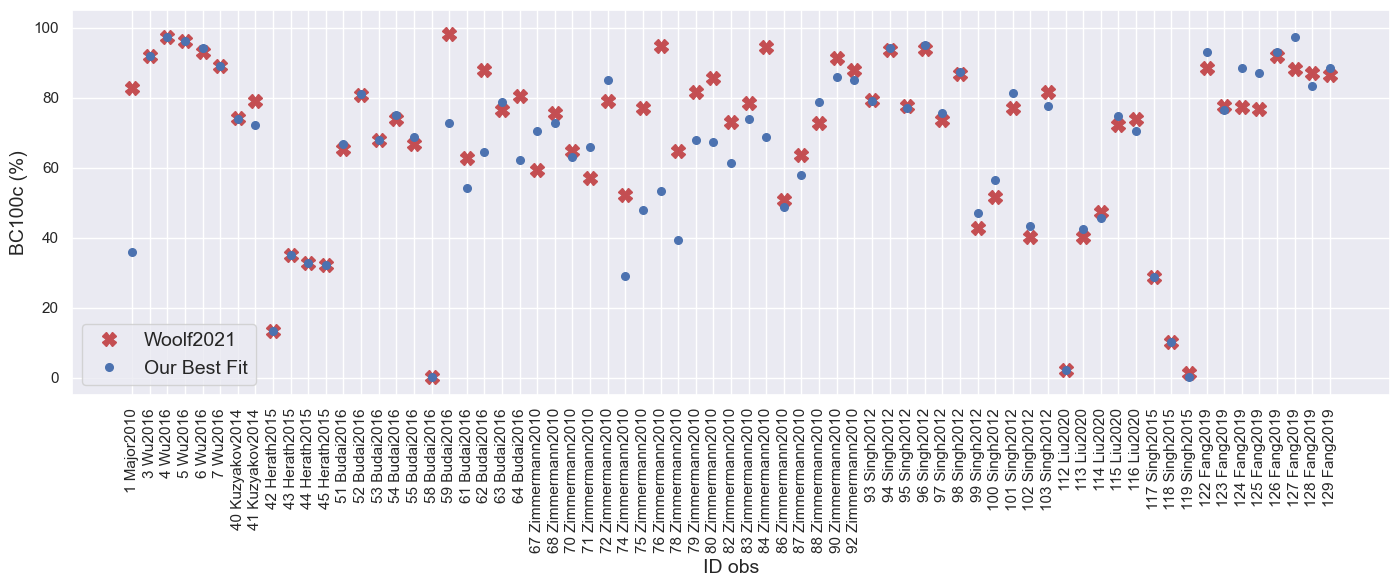

In [31]:
# load woolf data
woolf_fp= '../biocharStability/database/former-assessment/2021_Woolf_EST_Supporting Information_edited_ESA.xlsx'
woolf = pd.read_excel(woolf_fp, sheet_name='Fperm', index_col=None, usecols='A:T', skiprows=7)
woolf.set_index('ID_Woolf2021', inplace=True)

# matching the observations in our data & Woolf data
woolf_ids = list(woolf.index)
subset_metadata = metadata[metadata['ID_Woolf2021'].isin(woolf_ids)]
subset_data = data[ data['ID_obs'].isin(list(subset_metadata.index))]
subset_ids = list(subset_metadata.index)
subset_fitdata = bestfit[ bestfit['ID_obs'].isin(subset_ids)].copy(deep=True)
subset_fitdata['ID_Woolf2021'] = [ subset_metadata.loc[ids, 'ID_Woolf2021'] for ids in subset_fitdata['ID_obs']] # the matching

cols=['Molar Hydrogen to organic carbon ratio of the biochar', 'Temperature at which decomposition experiment was conducted (°C)',
 'C1', 'C2', 'C3', 'k1', 'k2', 'k3', 'Q10', 'fT', 'k1_fperm', 'k2_fperm', 'k3_fperm', 'Fperm', 'Fperm,initial', 'DeltaFperm']
subset_fitdata_ext = subset_fitdata.merge(woolf[cols], on='ID_Woolf2021', suffixes=(None, '_W'), validate='1:1') # the dataframe with both data

print("Our dataset & Woolf dataset have {} observations in common, for metadata.".format(len(subset_ids)))
print("Our dataset & Woolf dataset have {} observations in common, for metadata and fitdata.".format(len(subset_fitdata_ext)))

fig, ax = plt.subplots(figsize=(17,5))
ax.plot(subset_fitdata_ext['Fperm']*100, 'rX', markersize=10)
ax.plot(subset_fitdata_ext['BC100c'], 'b.', markersize=11)
names = [ str(i)+' '+metadata.loc[i, 'AuthorDate'] for i in list(subset_fitdata_ext['ID_obs'])]

ax.xaxis.grid()
ax.yaxis.grid()
plt.xticks(ticks=np.arange(0, len(subset_fitdata_ext)), labels=names)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.xlabel('ID obs', fontsize=14)
plt.ylabel('BC100c (%)', fontsize=14)
ax.set_ylim(0-5,100+5)
plt.legend(['Woolf2021', 'Our Best Fit'], fontsize=14)
plt.grid()

if False:
    plt.savefig('../simulations/demo-comparison-woolf-fits-p0.png', dpi=150, bbox_inches='tight')

In [7]:
for i in subset_fitdata_ext['ID_obs']:
    bs.plot_woolf_comparison(i, subset_fitdata_ext, data, metadata, saveTo='../simulations/demo-woolf-comparison-p0/');
    plt.close();

## Select the observations used in correlation model

Reasons for excluding observations shall be motivated. This can be an interative process.

In [32]:
## obs = metadata.index
bestfit = pd.read_excel('../simulations/demo-bestfits_p0.xlsx', index_col=0)
obs = metadata.index
obs = bs.apply_has_decay_data(obs, metadata, data, withPrint=True) # obvious, decay data must be available

# we excluded observations with pyrolysis temperature below 150, as they correspond to biomass control (dried biomass, not biochar)
obs = bs.apply_exclude_by_numeric(obs, metadata, var='HHT', excl_lower_than=150, excl_higher_than=None, withPrint=True)

# we excluded incubations durations shorter than xx years as they are likey not representative of long term-conditions.
obs = bs.apply_exclude_by_duration(obs, metadata, excl_shorter_than=360*1., excl_longer_than=None) 

# we could selectively remove some observations because they have bad decay data or poor fitting
obs = bs.apply_exclude_exactly(obs, excl=[])

for_model = bs.apply_intersect_best_fits(obs, bestfit)

Applying: HasDecayData. Excluded 45 observations, reducing from 175 to 130 remaining observations.
Applying: HHT. Excluded 5 observations, reducing from 130 to 125 remaining observations.
Applying: IncubationDuration. Excluded 7 observations, reducing from 125 to 118 remaining observations.
Applying: RemoveExactly. Excluded 0 observations, reducing from 118 to 118 remaining observations.
Following observations are in `data` but have no `best-fit`:  {111, 39}
Number of observations available for the correlation model:  116


Note:
* while doing the intersection of observation and bestfit available, 2 more observations are excluded, they are the 2 observations from article Dharmakeerthi2015 (for which we have the total C flux, but not the biochar C flux).

## Search for correlations with the metadata

Let's reproduce the correlation proposed by Woolf et al. 2021, between BC100 and H/C.

The parameter x=`H/C_all` contains 2 NaN values, from observations: [40, 41]
Remaining number of observations in the graph:114
Linear regression: BC_Th_Ts = -65.07 x H/C_all + 101.69 | R2 = 0.30


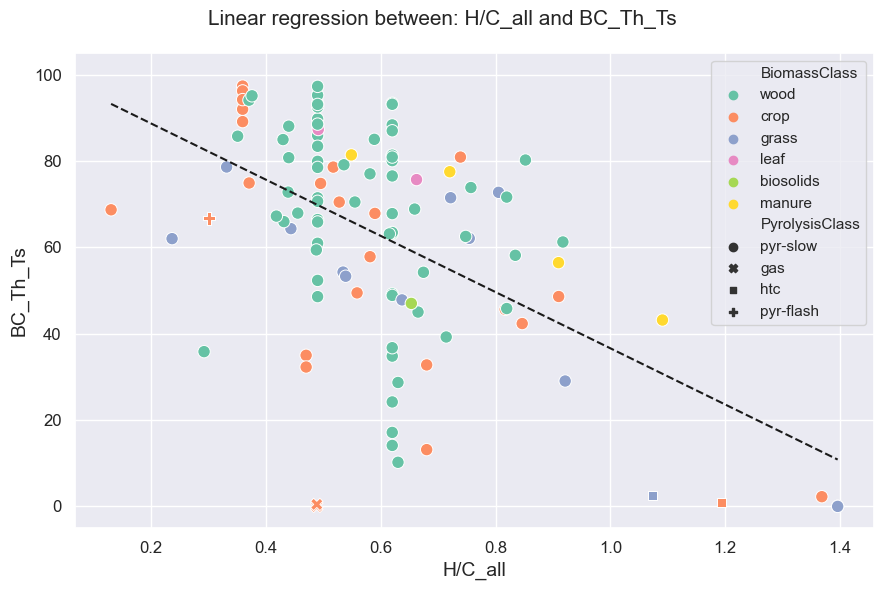

In [33]:
%matplotlib inline
fig, ax = bs.correlation_linear(for_model, metadata, 
                                x='H/C_all', y='BC_Th_Ts', Ts=14.9, Th=100, plot=True, 
                                trendline=True, trenderror=False)
# the function can raise an error if you have not fitted all types of models (single-double-triple-power),
# because of a list of parameters that would not be in your Excel data ;-) but that should not happen with the demo fitting strategies above

Let's reproduce the correlation proposed by Woolf et al. 2021, in interactive mode!

The parameter x=`H/C_all` contains 2 NaN values, from observations: [40, 41]
Remaining number of observations in the graph:114
Linear regression: BC_Th_Ts = -65.08 x H/C_all + 101.56 | R2 = 0.30


interactive(children=(IntSlider(value=100, description='TimeHorizon', max=1000, step=50), FloatSlider(value=15…

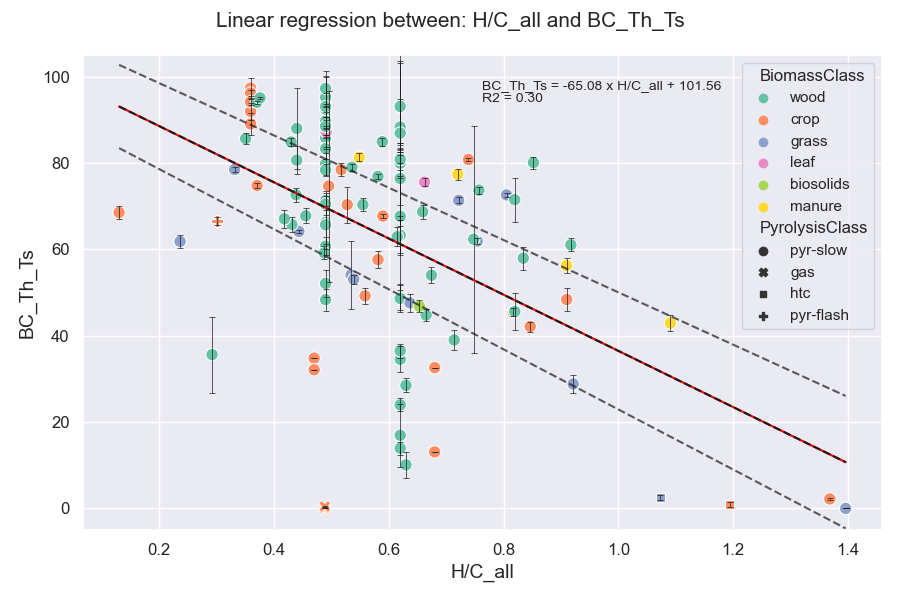

In [34]:
import ipywidgets as widgets
%matplotlib widget

TH_slider = widgets.IntSlider(
    value=100, 
    min=0, max=1000, step=50,
    description='TimeHorizon',
    continuous_update=True
)

TS_slider = widgets.FloatSlider(
    value=15, 
    min=0, max=30, step=0.5,
    description='SoilTemperature',
    continuous_update=True
)

fig, ax = bs.correlation_linear(for_model, metadata, x='H/C_all', y='BC_Th_Ts', Ts=15, Th=100, plot=True)

def update(changeTH, changeTS):
    #print("change", change, type(change))
    bs.correlation_linear(for_model, metadata, x='H/C_all', y='BC_Th_Ts', Ts=changeTS, Th=changeTH, plot=False, interactive=True, ax=ax, ifig=fig,
                                        iobs=73)
    fig.canvas.draw()

ie = widgets.interact(update, changeTH=TH_slider, changeTS=TS_slider)

We've reproduced part of the results from the Woolf 2021 paper, in couple of minutes.

Which are the observations that are "off" the correlation? Can we understand why?

Observations:
- 46, 47: Ventura paper. H/C is 0.5, but 100-year perm is 0.

- 45, 44, 43, 42: Herath paper:

- 22, 28, 21, 10, 27: Fang 2014 paper, at incubation temperature 60 & 40 degrees! Note: that after temperature correction; they should be similar to the other observations at 20C, but it is not the case. Sign that the temperature correction is not great!

We can check the metadata below, but also the fitting figures.

In [36]:
metadata.loc[[46, 47, 45, 44, 43, 42, 22, 28, 21, 10, 27],:].T.head(40)

ID_obs,46,47,45,44,43,42,22,28,21,10,27
ID_art,31,31,8,8,8,8,5,5,5,5,5
AuthorDate,Ventura2019,Ventura2019,Herath2015,Herath2015,Herath2015,Herath2015,Fang2014,Fang2014,Fang2014,Fang2014,Fang2014
NameObs,Italy - roots (undisturbed soil),Italy - no roots (trenching),Andisol CS-550,Andisol CS-350,Alfisol CS-550,Alfisol CS-350,QLD-450-60,SA-450-60,QLD-450-40,NSW-450-60,SA-450-40
Replicates,4,4,3,3,3,3,4,4,4,4,4
Biomass,Maize (Zea mays L.) pelletized silage feedstock,Maize (Zea mays L.) pelletized silage feedstock,fresh corn stover,fresh corn stover,fresh corn stover,fresh corn stover,"Eucalyptys saligna wood, 13C depleted","Eucalyptys saligna wood, 13C depleted","Eucalyptys saligna wood, 13C depleted","Eucalyptys saligna wood, 13C depleted","Eucalyptys saligna wood, 13C depleted"
BiomassClass,crop,crop,crop,crop,crop,crop,wood,wood,wood,wood,wood
BiomassLignin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pyrolysis,Advanced Gasification Technology s.r.l. at atm...,Advanced Gasification Technology s.r.l. at atm...,"gas‐fired rotating drum kiln, inner volume of 5L","gas‐fired rotating drum kiln, inner volume of 5L","gas‐fired rotating drum kiln, inner volume of 5L","gas‐fired rotating drum kiln, inner volume of 5L","slow pyrolysis by Pacific Pyrolysis, in Daisy ...","slow pyrolysis by Pacific Pyrolysis, in Daisy ...","slow pyrolysis by Pacific Pyrolysis, in Daisy ...","slow pyrolysis by Pacific Pyrolysis, in Daisy ...","slow pyrolysis by Pacific Pyrolysis, in Daisy ..."
PyrolysisClass,gas,gas,pyr-slow,pyr-slow,pyr-slow,pyr-slow,pyr-slow,pyr-slow,pyr-slow,pyr-slow,pyr-slow
HHT,1200.0,1200.0,550.0,350.0,550.0,350.0,450.0,450.0,450.0,450.0,450.0


We can also plot predicted timeseries...

In [35]:
np.seterr(divide='ignore', invalid='ignore') # ignore message "divide by 0", occuring in stdev

#Warning - at high time & temperature resolution, the cell takes 2-3 minutes to run
TS = np.arange(5, 30, 5) #[10, 15, 20]
TH = np.arange(0, 1010, 10) #[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200]

In [36]:
vX, vXnan, megaY, megaYnan, megaCoeffs, megaSCoeffs = bs.calc_correlation_timeseries(for_model, metadata,
                                                        x = ['H/C_all'], outliers=None, Ts= TS, Th= TH)

with open('../simulations/demo-correlation_HC_highres_2022-11-16.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump([vX, vXnan, megaY, megaYnan, megaCoeffs, megaSCoeffs], file)

In [37]:
with open('../simulations/demo-correlation_HC_highres_2022-11-16.pkl', 'rb') as file:  
    # Call load method to deserialze
    vX, vXnan, megaY, megaYnan, megaCoeffs, megaSCoeffs = pickle.load(file)

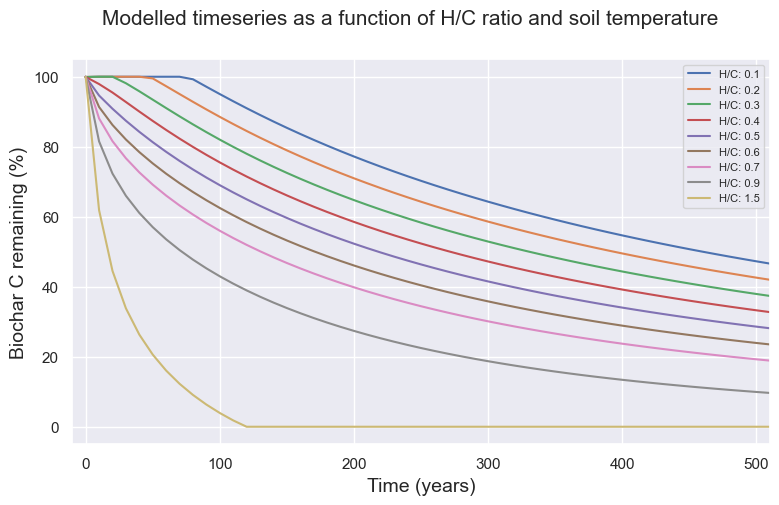

In [38]:
%matplotlib inline
fig, ax = bs.plot_correlation_timeseries(for_model, metadata, 
                            [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9, 1.5], 
                            [15], 
                            TH,
                            vX, vXnan, megaY, megaYnan, megaCoeffs, megaSCoeffs,
                            fig=None, ax=None, TH_lim=500,
                               )

interactive(children=(FloatSlider(value=15.0, description='SoilTemperature', max=25.0, min=5.0, step=5.0), Out…

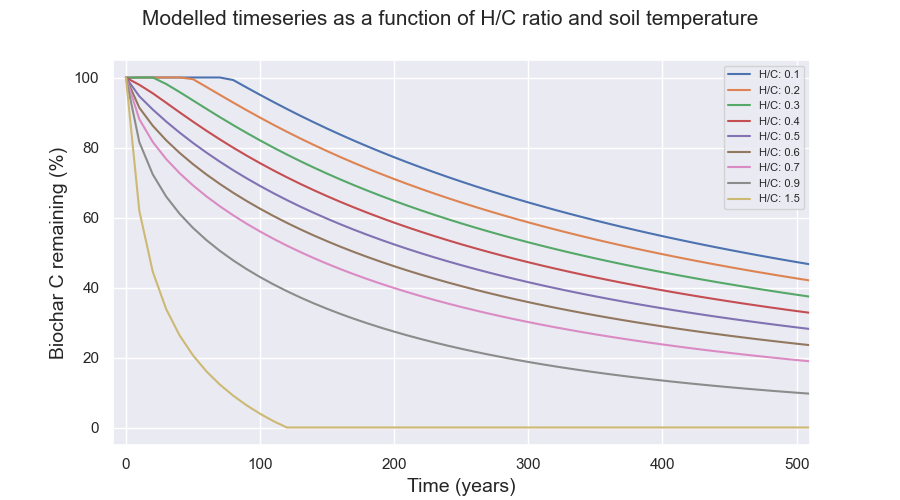

In [39]:
%matplotlib widget
TS_slider = widgets.FloatSlider(value=15, min=5, max=25, step=5, description='SoilTemperature', continuous_update=True)
figgy, ax = bs.plot_correlation_timeseries(for_model, metadata, 
                            [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9, 1.5], 
                            [15], 
                            TH,
                            vX, vXnan, megaY, megaYnan, megaCoeffs, megaSCoeffs,
                            fig=None, ax=None, TH_lim=500)
def update(changeTS):
    #print("change", change, type(change))
    _, _ = bs.plot_correlation_timeseries(for_model, metadata, 
                            [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9, 1.5], 
                            [changeTS], 
                            TH,
                            vX, vXnan, megaY, megaYnan, megaCoeffs, megaSCoeffs,
                            fig=figgy, ax=ax, TH_lim=500)    
    figgy.canvas.draw()
ie = widgets.interact(update, changeTS=TS_slider)

More advanced can and have been done, in terms of correlation search, whether it is PCA, Factor analysis, or Decision Tree algorithms. 

No demo for that yet, but you can browser the "development" notebooks. We don't guaratee they work smoothly, and they are for sure a bit messy.